### Seattle Airbnb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#### Question 1

**1.** What are the busiest times of the year to visit Seattle?

In [3]:
#Drop the rows when the Airbnbs are available, and then count the number of not available days for each Airbnb.
busiest_times = calendar.drop(calendar[calendar.available == 't'].index).groupby('date').count() 

#Sort the dataframe by the number of not available days.
sorted_busiest_times = busiest_times.sort_values(by = ['available'], ascending = False)

#The busiest times of the year to visit Seattle are January and July months.
sorted_busiest_times.head(50)

,listing_id,available,price
date,,,
2016-01-04,2083,2083,0
2016-01-07,2042,2042,0
2016-01-08,2036,2036,0
2016-01-06,1992,1992,0
2016-01-09,1962,1962,0
2016-01-05,1951,1951,0
2016-01-16,1857,1857,0
2016-01-15,1830,1830,0
2016-01-10,1809,1809,0


#### Question 2

**2.** Is there a general upward trend of new Airbnb listings?

In [4]:
#The datatype of column 'host_since' is object.
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
#Convert the datatype of column 'host_since' to datetime.
listings['host_since_date'] = pd.to_datetime(listings['host_since'])

#Create a new column by keeping the year and month of the column 'host_since'.
listings['year_month'] = listings['host_since_date'].dt.strftime('%Y-%m')

#We can also create new columns by just keeping the year or the month.
#listings['year'] = listings['host_since_date'].dt.strftime('%Y')
#listings['month'] = listings['host_since_date'].dt.strftime('%m')

#Count the number of new Airbnbs by groupby the 'year_month', and then sort the result by time order.
new_listings = listings.groupby('year_month').count().sort_values(by = ['year_month'], ascending = True)
new_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_date
year_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-11,4,4,4,4,4,4,3,4,4,3,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,0,4,4,2,4,2,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,4,0,4,4,4,4,4,4,3,4
2009-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
2009-02,2,2,2,2,2,2,2,2,2,0,1,0,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,1,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2
2009-03,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,1,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2
2009-04,3,3,3,3,3,0,3,3,3,2,2,0,2,2,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3
2009-05,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
2009-06,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,0,2,2,2,2,2,2,1,2
2009-08,20,20,20,20,20,20,19,20,20,11,12,13,16,16,20,16,20,20,20,20,20,20,19,19,19,20,20,20,20,20,20,20,20,20,20,18,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,19,20,20,20,3,20,11,11,13,9,20,20,20,20,20,20,20,20,20,20,20,20,19,19,19,19,19,19,19,19,19,20,0,20,20,20,20,20,20,19,20
2009-09,8,8,8,8,8,0,8,8,8,2,0,2,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,5,8,8,8,8,1,8,7,7,0,5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,8,8,8,8,8,8,8,8


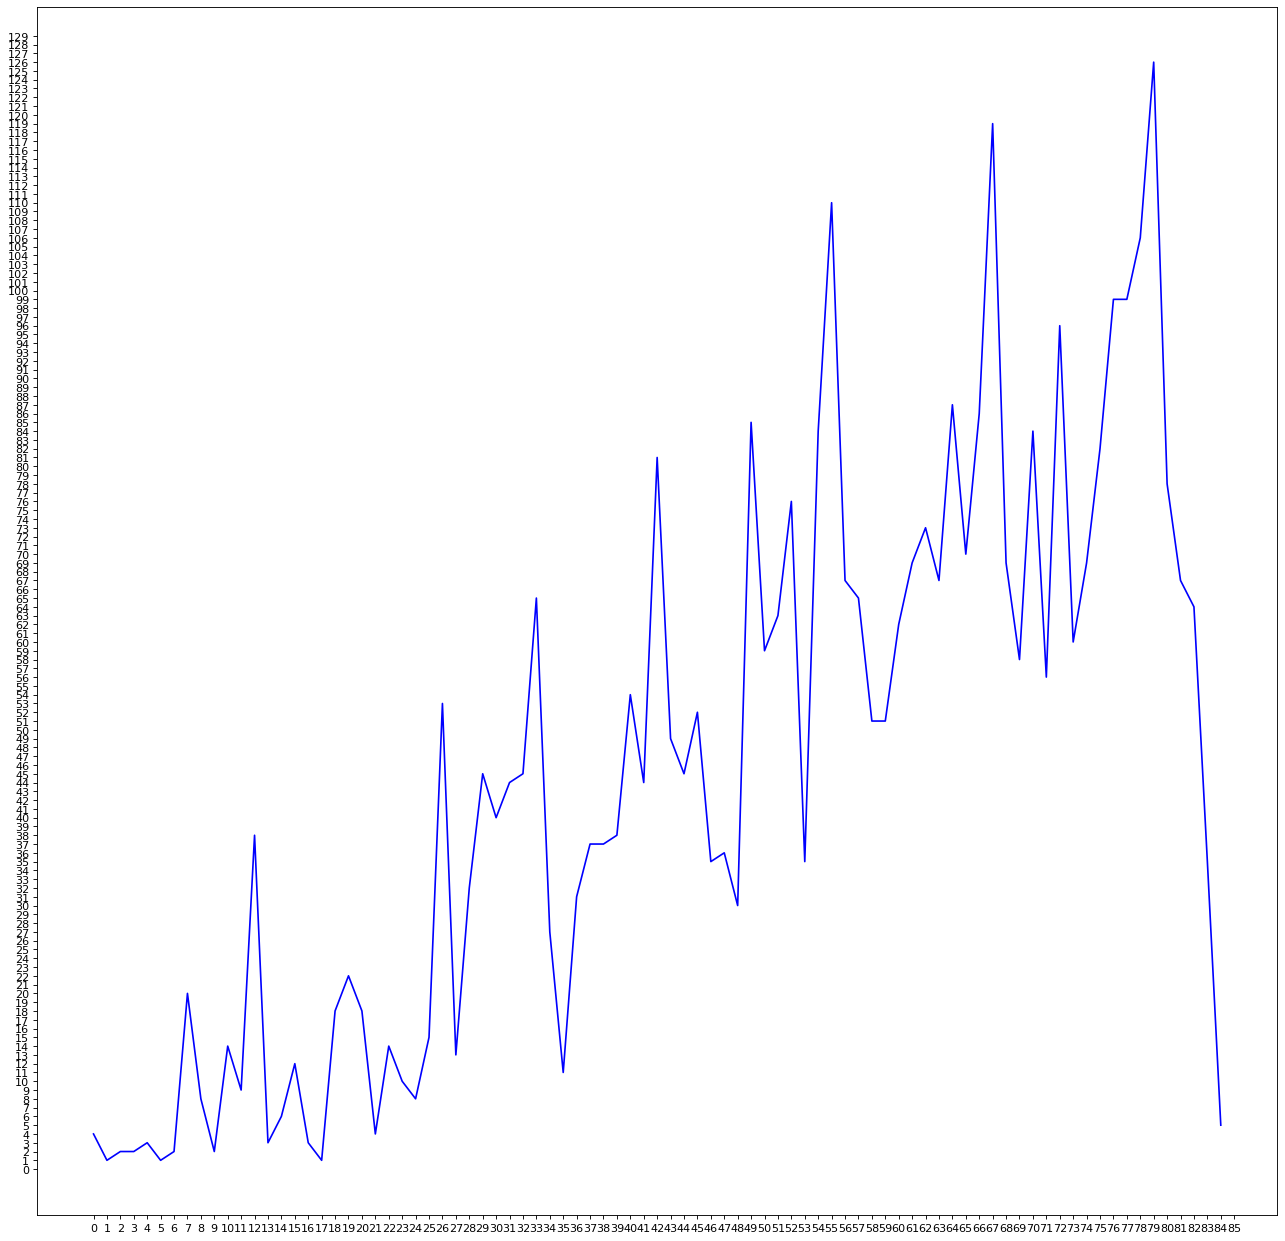

In [15]:
#There is a general upward trend of new Airbnb listings from 2008-11 to 2015-08, 
#but there is also a downward trend from 2015-08 to 2016-01.

num1 = new_listings.loc[:,'id']

plt.figure(figsize=(20, 20), dpi=80)

plt.plot(range(len(num1)), num1, color="b")

plt.xticks(range(len(num1)+1))
plt.yticks(range(130))

plt.show()

#### Question 3

**3.** Is there a general upward trend of total Airbnb visitors to Seattle?

In [13]:
#Sort the number of not available days by time order.
sorted_busiest_times2 = busiest_times.sort_values(by = ['date'], ascending = True)
sorted_busiest_times2

,listing_id,available,price
date,,,
2016-01-04,2083,2083,0
2016-01-05,1951,1951,0
2016-01-06,1992,1992,0
2016-01-07,2042,2042,0
2016-01-08,2036,2036,0
2016-01-09,1962,1962,0
2016-01-10,1809,1809,0
2016-01-11,1738,1738,0
2016-01-12,1704,1704,0


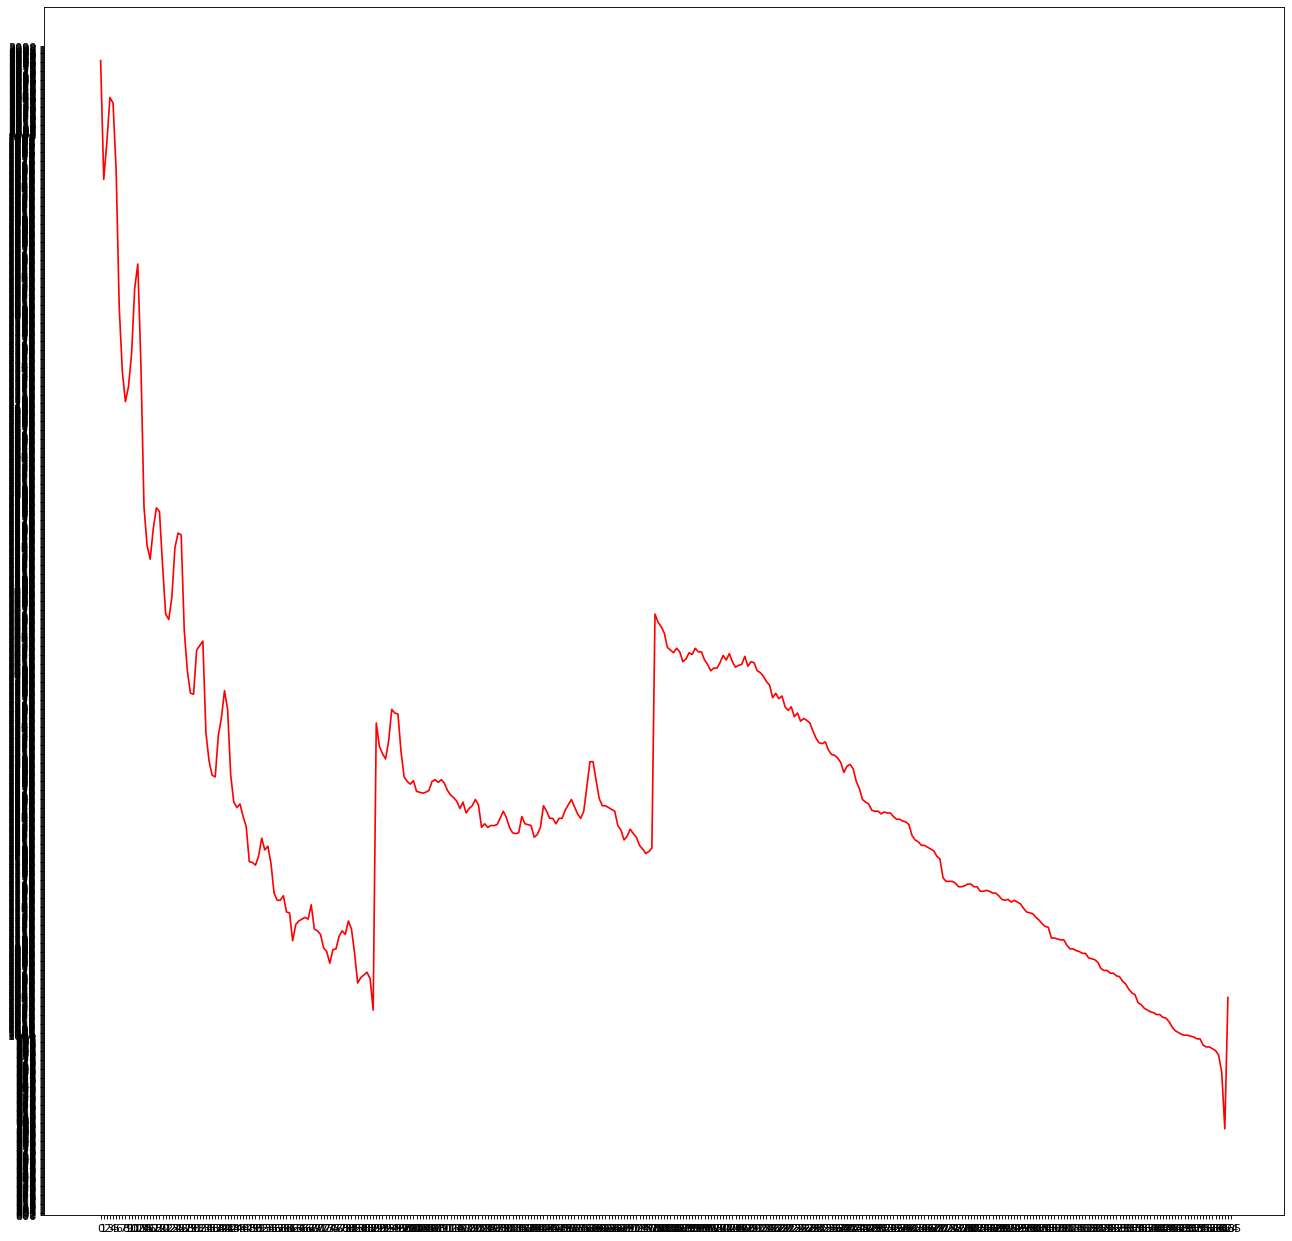

In [18]:
#There is no general upward trend of total Airbnb visitors to Seattle.
#However, there is obvious downward trend of total Airbnb visitors to Seattle from 2016-01-04 to 2017-01-02.

num2 = sorted_busiest_times2.loc[:,'listing_id']

plt.figure(figsize=(20, 20), dpi=80)

plt.plot(range(len(num2)), num2, color="r")

plt.xticks(range(len(num2) + 1))
plt.yticks(range(800, 2100))

plt.show()